# fastMRI Image Reconstruction
## Inference

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import h5py, os
import numpy as np
import time
from torch.utils.data import DataLoader
from functions import transforms as T
from functions.subsample import MaskFunc
from scipy.io import loadmat
from matplotlib import pyplot as plt
from models import models42 as m42

In [2]:
file_path='C:/Users/Ersalina/NeuralComp_G42/saved_params'
model_path='C:/Users/Ersalina/NeuralComp_G42/saved_params/UNet_6.pth'

test_file_path='C:/Users/Ersalina/NC_Final_Assignment/fastMRI/NC2019MRI/test'

In [3]:
for fname in sorted(os.listdir(test_file_path)):
    with h5py.File(test_file_path+'/'+fname,  "r") as hf:
        volume_kspace_4af = hf['kspace_4af'][()]
        volume_kspace_8af = hf['kspace_8af'][()]
        print(f'{fname} 4af 8af',volume_kspace_4af.shape, volume_kspace_8af.shape)
        

file1000817.h5 4af 8af (35, 640, 372) (35, 640, 372)
file1000818.h5 4af 8af (36, 640, 368) (36, 640, 368)
file1000831.h5 4af 8af (38, 640, 368) (38, 640, 368)
file1000842.h5 4af 8af (38, 640, 372) (38, 640, 372)
file1000858.h5 4af 8af (33, 640, 368) (33, 640, 368)
file1000871.h5 4af 8af (34, 640, 372) (34, 640, 372)
file1000885.h5 4af 8af (30, 640, 372) (30, 640, 372)
file1000891.h5 4af 8af (35, 640, 372) (35, 640, 372)
file1000899.h5 4af 8af (33, 640, 386) (33, 640, 386)
file1000903.h5 4af 8af (33, 640, 368) (33, 640, 368)
file1000925.h5 4af 8af (30, 640, 372) (30, 640, 372)
file1000926.h5 4af 8af (37, 640, 368) (37, 640, 368)
file1000932.h5 4af 8af (30, 640, 372) (30, 640, 372)
file1000942.h5 4af 8af (35, 640, 368) (35, 640, 368)
file1000972.h5 4af 8af (42, 640, 368) (42, 640, 368)
file1000976.h5 4af 8af (40, 640, 368) (40, 640, 368)
file1000990.h5 4af 8af (40, 640, 368) (40, 640, 368)
file1001031.h5 4af 8af (38, 640, 372) (38, 640, 372)
file1001057.h5 4af 8af (37, 640, 368) (37, 640

<class 'list'>
20400
20400


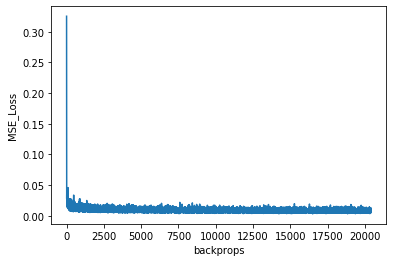

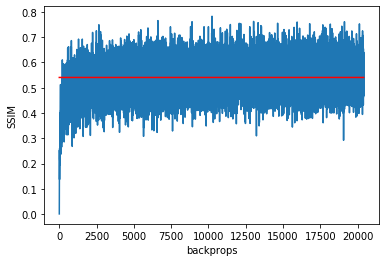

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)
38 minutes#


In [4]:
model=m42.UNet(1,1)
# set learning rate
lr = 1e-1
optimiser = optim.SGD(model.parameters(), lr=lr)
# Load the saved model hperparameters
checkpoint=(torch.load(model_path,map_location='cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
optimiser.load_state_dict(checkpoint['optimiser_state_dict'])
losses=checkpoint['Loss']
SSIMval=checkpoint['SSIM']
sec=checkpoint['Time']
SSIM_mean=np.mean(SSIMval)
print(type(losses))
print(len(losses))
print(len(SSIMval))
plt.plot(range(len(losses)),losses,label="Training loss")
plt.xlabel("backprops")
plt.ylabel("MSE_Loss")
plt.show()
plt.plot(range(len(SSIMval)),SSIMval,label="SSIM")
plt.plot(range(len(SSIMval)),np.full(len(SSIMval),SSIM_mean),'r')
plt.xlabel("backprops")
plt.ylabel("SSIM")
plt.show()
print(optimiser)

print(sec,'minutes#')

In [5]:
def kspace2real(data):
    return T.complex_abs(T.ifft2(T.to_tensor(data)))
def show_slices(data, slice_nums, cmap=None): # visualisation
    fig = plt.figure(figsize=(15,10))
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)
        plt.axis('off')
def Construct_Images(data,model):
    figure

## Show the test data

In [ ]:
print('##################################### 4-fold acc ########################################')
show_slices(kspace2real(volume_kspace_4af),[5, 10, 20, 30],cmap='gray')
print('##################################### 8-fold acc ########################################')
show_slices(kspace2real(volume_kspace_8af),[5, 10, 20, 30],cmap='gray')

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 4525424640 bytes. Buy new RAM!


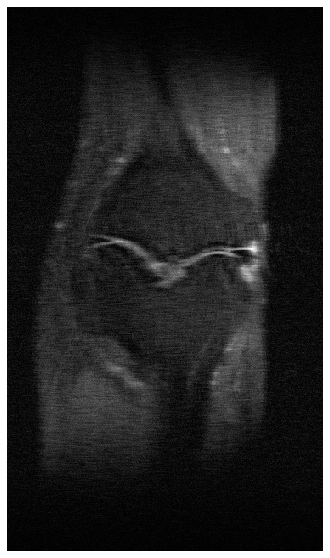

In [7]:
#print(kspace2real(volume_kspace_4af).shape)
inp=kspace2real(volume_kspace_4af)
Shape=inp.shape
inp=inp.view(Shape[0],1,Shape[1],Shape[2])
# Reconstruct the Image
#IR=model(inp[20])
fig = plt.figure(figsize=(15,10))
plt.imshow(inp[20][0], cmap='gray')
plt.axis('off')


inp2=torch.randn(1,1,2,2)
out=model(inp)
print(out.shape)
